# Stock Market Prediction using LSTM

The Long Short-Term Memory model in Keras is a powerful tool for predictions out of sequences, especially for stock market predictions, as previous prices of stock is necessary for predicting future prices. The LSTM models have similar workflow to recurrent neural networks. It processes and passes on data as it propagates with a specific keep or forget mechanism. 

In [2]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=ddc1660f820d6da842e086e57cf38999142c0eedf384d67f5b41c03fadc601b5
  Stored in directory: c:\users\kulsum kamal\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=577694438aca5a2b069dd7b1ae829ccbf717f326df610949c0d55e75406d00ee
  Stored in directory: c:\users\kulsum kamal\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30710 sha256=570673f1527bc56e5f9c8ab3e66527b761a9fb5920e45bb471d66c91e5e892e1
  Stored in directory: c:\users\kulsum kamal\appdata\local\pip\cache\wheels\f1\60\77\22b9b5887bd47801796a856f47650d9789c74dc3161a26d608
Successfully built termcolor wrapt clang
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Uninstalling wrapt-1.

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

## Loading the dataset

In [3]:
data = pd.read_csv('../Downloads/NSE-TATAGLOBAL.csv')

### Preview of data

In [4]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


The Open column indicates the opening price on a certain day, whereas the 'Close' column indicates the closing price of stocks on that day. The 'High' and 'Low' columns indicate the highest and lowest price on a certain day respectively.

In [5]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [6]:
data.shape

(2035, 8)

In [7]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [8]:
data.isnull().sum() #checking for missing data

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [40]:
data = data.iloc[::-1]

## Visualising change of stock price over time

Closing price trends:

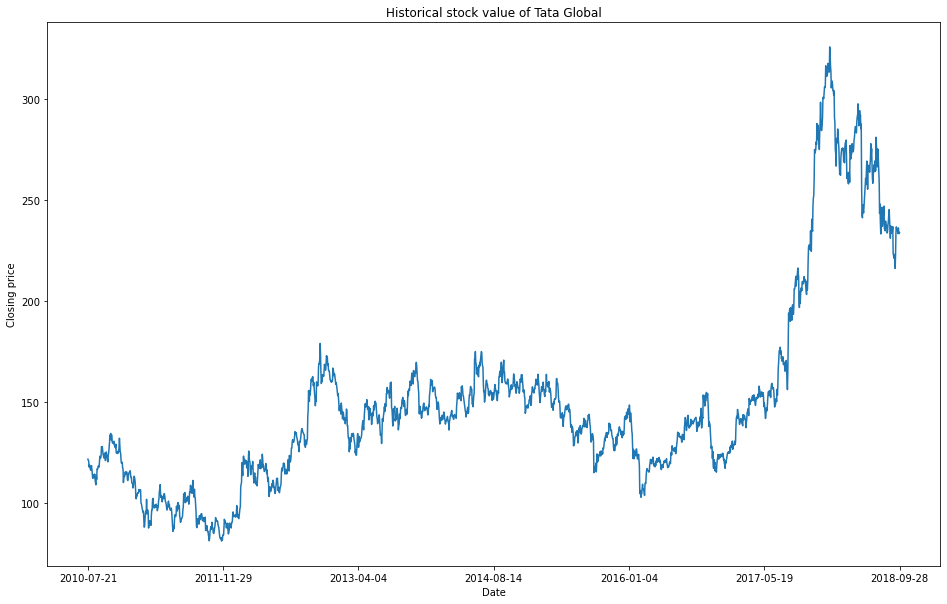

In [41]:
plt.figure(figsize = (16,10))
sns.lineplot(x='Date', y='Close', data=data )
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.title('Historical stock value of Tata Global')
plt.xticks(data['Date'][::339])
plt.show()

## Feature Scaling

The dataset is scaled from numbers between zero to one for optimal performance and data is created using timesteps.

### Splitting the data into training and testing sets

In [42]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_set = scaler.fit_transform(data.filter(['Close']).values)
training_data_len = int(np.ceil( len(data.filter(['Close']).values) * .8))
#Creating the scaled training data set
training_set = scaled_set[0: training_data_len, :]
X_train = []
y_train = []

# data is converted to 3 dimension using NumPy of 60 timestamps
for i in range(60, len(training_set)):
    X_train.append(training_set[i-60:i, 0])
    y_train.append(training_set[i, 0])

# X_train and y_train are converted to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1568, 60, 1)

In [43]:
test_set = scaled_set[training_data_len - 60:, :] 
X_test = []
y_test = data.filter(['Close']).values[training_data_len:, :]

for i in range(60, len(test_set)):
    X_test.append(test_set[i-60:i, 0])

# Converting the data to a numpy array
X_test = np.array(X_test)

# Reshaping the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1 ))
X_test.shape

(407, 60, 1)

## Building the LSTM Model

In [44]:
model = Sequential()
model.add(LSTM(units=128, return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compiling the model using 'adam' optimizer and mean_absolute_error as loss function
model.compile(optimizer='adam', loss='mean_absolute_error')

# Fitting the model
model.fit(X_train, y_train)

49/49 [==============================] - 3s 35ms/step - loss: 0.0385


## Making Predictions

In [45]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Getting the mean absolute error
mae = mean_absolute_error(y_test, predictions)
print(mae)

9.306354307132505


## Plotting the predictions

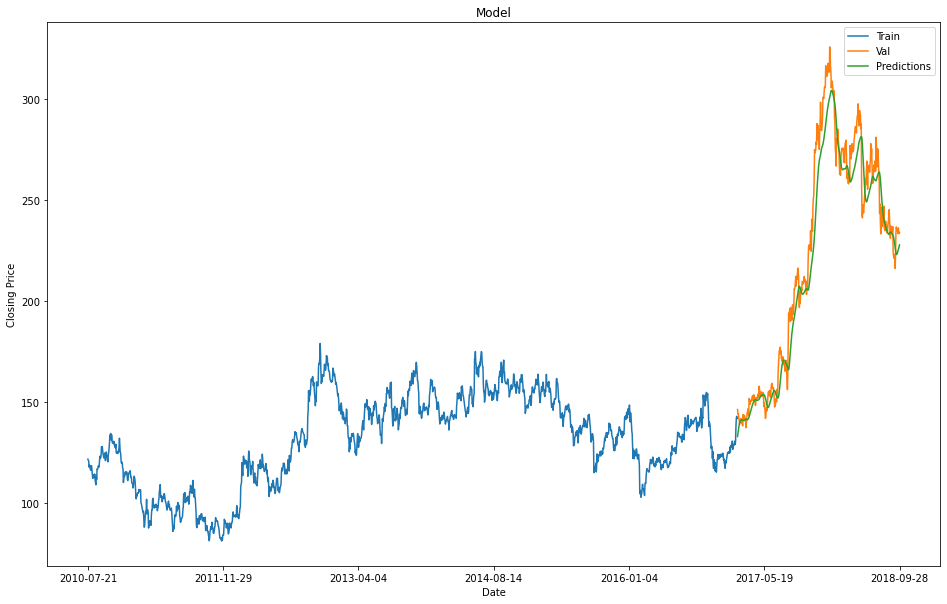

In [46]:
train = data.filter(['Close','Date'])[:training_data_len]
valid = data.filter(['Close','Date'])[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize = (16,10))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Closing Price')
#plt.plot(train['Close'])
#plt.plot(valid[['Close', 'Predictions']])
sns.lineplot(x='Date', y='Close', data=train )
sns.lineplot(x='Date', y='Close', data=valid )
sns.lineplot(x='Date', y='Predictions', data=valid )
plt.xticks(data['Date'][::339])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()

It is quite clear that the model is capable of predicting the future prices accurately. 